In [4]:
import idx2numpy
import scipy
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import rcParams
from bokeh.plotting import figure, show, output_file
rcParams['figure.figsize'] = 5, 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from PIL import Image
# from StringIO import StringIO
import base64
import pprint
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

print(np.version.version)

1.10.1


# Load images

In [5]:
images = idx2numpy.convert_from_file(open('train-images.idx3-ubyte', 'rb'))
labels = idx2numpy.convert_from_file(open('train-labels.idx1-ubyte', 'rb'))

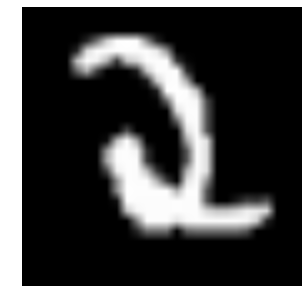

NUMBER
2


In [7]:
def Show(n):
    plt.imshow(images[n], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    print ("NUMBER")
    print (labels[n])
    
Show(400)

# Vectorize images

In [8]:
vectorized_images = []
for im in images:
    b=[]
    for row in im:
        for d in row:
            b.append(d)
    vectorized_images.append(b)
    


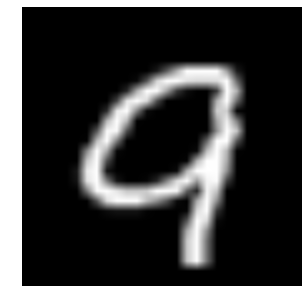

In [9]:
def imageFromVector( vec ):
    l = int(np.sqrt( len(vec) ))
    I = np.zeros((l,l))
    k = 0
    for i in range(0,l):
        for j in range(0,l):
            I[i,j] = vec[k]
            k+=1
            
    return I
            
I = imageFromVector(vectorized_images[3000] )
plt.imshow( I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# group images per labels

In [10]:
images_bank = dict()
for i in range(0,10):
    images_bank[i] = []
    
for i in range(0,len(labels)):
    images_bank[labels[i]].append(vectorized_images[i]  )

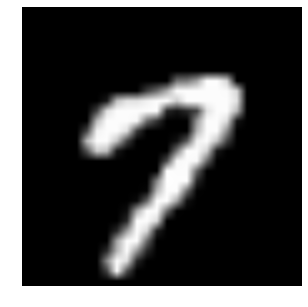

In [11]:
I = imageFromVector(images_bank[7][0] )
plt.imshow( I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# group all vectors

In [13]:
M_vecs = dict()
print (len(vectorized_images[0]))
for i in range(0,10):
    M_vecs[i] = np.vstack( [v for v in images_bank[i]] ).transpose()

784


# perform PCA

In [15]:
from sklearn.decomposition import FastICA, PCA

NB_COMPONENTS = 10
i = 8

# I = imageFromVector(images_bank[i][1] )
# plt.imshow( I, cmap=plt.cm.gray)
# plt.axis('off')
# plt.show()

pca = PCA(n_components = NB_COMPONENTS)
pca.fit(M_vecs[i])
vecs_pca = pca.fit_transform(M_vecs[i])

vecs_restored = pca.inverse_transform(vecs_pca).transpose()
print (vecs_restored.shape)
print (vecs_pca.shape)

# result = vecs_pca.transpose() # displays componements
result = vecs_restored[:1,:] # displays images from componements

(5851, 784)
(784, 10)


In [16]:
all_vecs = []
for i in range( 0, result.shape[0]):
    vec = []
    for j in range(0,result.shape[1]):
        vec.append( result[i,j])
    all_vecs.append(vec)
    
print (len(all_vecs))

1


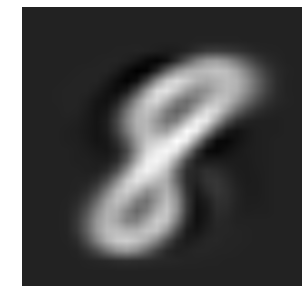

In [17]:
for v in all_vecs:
    I=imageFromVector( v )
    plt.imshow( I, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

# ICA

In [19]:
NB_COMPONENTS = 3
i = 8

# I = imageFromVector(images_bank[i][1] )
# plt.imshow( I, cmap=plt.cm.gray)
# plt.axis('off')
# plt.show()

ICA = FastICA(n_components = NB_COMPONENTS)
ICA.fit(M_vecs[i])
vecs_ICA = ICA.fit_transform(M_vecs[i])

vecs_restored = ICA.inverse_transform(vecs_ICA).transpose()
print (vecs_restored.shape)
print (vecs_ICA.shape)

result = vecs_ICA.transpose() # displays componements
result = vecs_restored[:1,:] # displays images from componements

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [66]:
all_vecs = []
for i in range( 0, result.shape[0]):
    vec = []
    for j in range(0,result.shape[1]):
        vec.append( result[i,j])
    all_vecs.append(vec)
    
print len(all_vecs)

1


In [ ]:
for v in all_vecs:
    I=imageFromVector( v )
    plt.imshow( I, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()